In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


Load Dataset

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
df.drop('Id',axis=1,inplace=True)

Encode Species 

In [8]:
le = LabelEncoder()
df["Species_encoded"] = le.fit_transform(df["Species"])

In [9]:
df["Species_encoded"].unique()

array([0, 1, 2])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
df=df.drop(columns=["Species"],axis=1)

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_encoded'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLengthCm    150 non-null    float64
 1   SepalWidthCm     150 non-null    float64
 2   PetalLengthCm    150 non-null    float64
 3   PetalWidthCm     150 non-null    float64
 4   Species_encoded  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species_encoded,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [15]:
X = df.drop("Species_encoded", axis=1)
y = df["Species_encoded"]

In [16]:
X.shape

(150, 4)

In [17]:
y.shape

(150,)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini',        # or 'entropy'
        max_depth=4,             # limits overfitting
        min_samples_split=4,     # minimum samples to split a node
        min_samples_leaf=2,      # minimum samples at a leaf node
        random_state=42
    ),

    "KNN": KNeighborsClassifier(
        n_neighbors=3,           # optimal value for small/medium datasets
        weights='distance',      # closer neighbors have more influence
        metric='minkowski',      # default, can switch to 'euclidean'
        p=2                      # for Euclidean distance
    ),

    "SVM": SVC(
        C=1.0,                   # regularization parameter
        kernel='rbf',            # Radial Basis Function kernel
        gamma='scale',           # default for automatic gamma
        probability=True,        # enables probability estimates
        random_state=42
    ),

    "Naive Bayes": GaussianNB(
        var_smoothing=1e-9       # helps stabilize calculations
    )
}

In [31]:
# K-Fold Cross Validation setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_results = []

# Perform cross-validation
for name, model in models.items():
    fold_accuracies = []

    for train_index, test_index in kf.split(X_scaled):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        acc = round(accuracy_score(y_test_fold, y_pred_fold), 2)
        fold_accuracies.append(acc)

    mean_acc = np.mean(fold_accuracies)
    print(f"\n=== {name} ===")
    print("Fold Accuracies:", fold_accuracies)
    print(f"Mean K-Fold Accuracy: {mean_acc:.2f}")

    cv_results.append({
        "Model": name,
        "K-Fold Accuracies": fold_accuracies,
        "Mean Accuracy": mean_acc
    })


=== Decision Tree ===
Fold Accuracies: [1.0, 0.97, 0.93, 0.9, 0.93]
Mean K-Fold Accuracy: 0.95

=== KNN ===
Fold Accuracies: [1.0, 0.97, 0.97, 0.9, 0.97]
Mean K-Fold Accuracy: 0.96

=== SVM ===
Fold Accuracies: [1.0, 0.97, 0.97, 0.93, 0.97]
Mean K-Fold Accuracy: 0.97

=== Naive Bayes ===
Fold Accuracies: [1.0, 0.97, 0.93, 0.97, 0.93]
Mean K-Fold Accuracy: 0.96


In [32]:
results_df = pd.DataFrame(cv_results)
results_df.head()

,Model,K-Fold Accuracies,Mean Accuracy
0,Decision Tree,"[1.0, 0.97, 0.93, 0.9, 0.93]",0.946
1,KNN,"[1.0, 0.97, 0.97, 0.9, 0.97]",0.962
2,SVM,"[1.0, 0.97, 0.97, 0.93, 0.97]",0.968
3,Naive Bayes,"[1.0, 0.97, 0.93, 0.97, 0.93]",0.960



=== Model Comparison ===
           Model  Mean Accuracy
2            SVM          0.968
1            KNN          0.962
3    Naive Bayes          0.960
0  Decision Tree          0.946


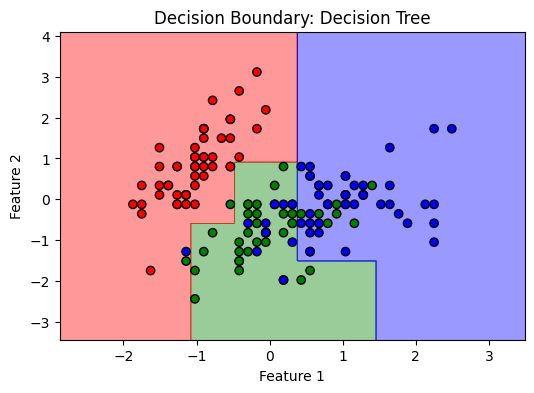

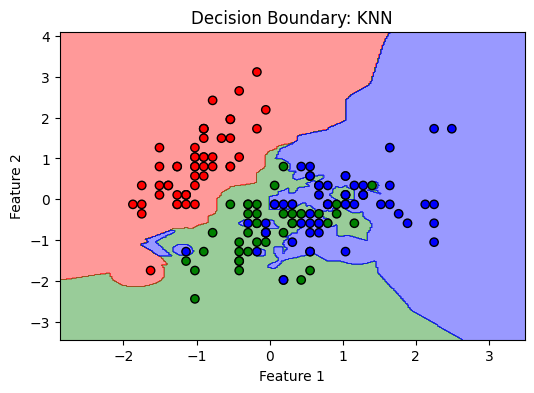

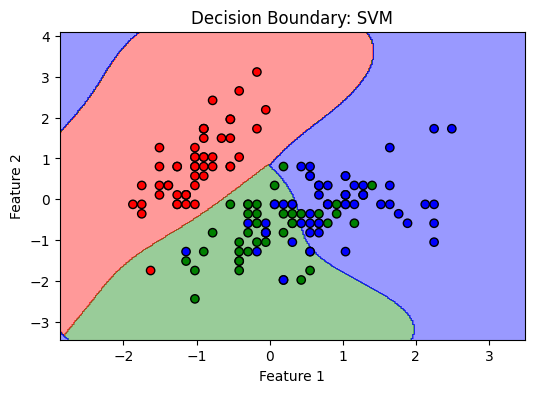

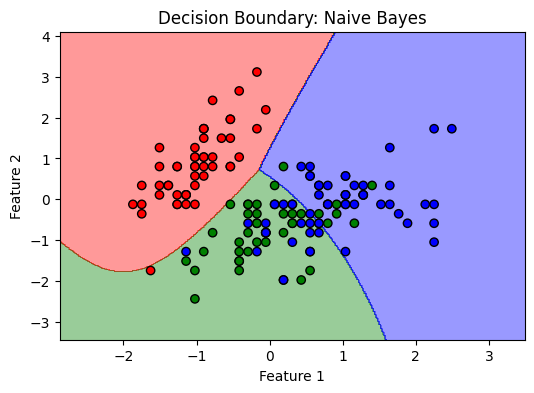

In [33]:

print("\n=== Model Comparison ===")
print(results_df[["Model", "Mean Accuracy"]].sort_values(by="Mean Accuracy", ascending=False))

# Decision Boundary Visualization (2 Features Only)
def plot_decision_boundary(model, X, y, title):
    X = X[:, :2]  # first two features only
    h = .02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Decision Boundary (first 2 features)
X_2d = X_scaled[:, :2]
for name, model in models.items():
    plot_decision_boundary(model, X_2d, y, f"Decision Boundary: {name}")

In [22]:
#03236313472 Abdullah 

Custom Models 

DecisionTree Model

In [34]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None

In [35]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return 1 - np.sum(probs ** 2)

    def _best_split(self, X, y):
        best_gain = -1
        split_idx, split_thresh = None, None
        n_samples, n_features = X.shape
        parent_impurity = self._gini(y)

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold

                if len(y[left_mask]) < self.min_samples_split or len(y[right_mask]) < self.min_samples_split:
                    continue

                left_impurity = self._gini(y[left_mask])
                right_impurity = self._gini(y[right_mask])
                n_left, n_right = len(y[left_mask]), len(y[right_mask])
                weighted_impurity = (n_left * left_impurity + n_right * right_impurity) / n_samples
                gain = parent_impurity - weighted_impurity

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature
                    split_thresh = threshold

        return split_idx, split_thresh

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_classes = len(y), len(np.unique(y))

        if (depth >= self.max_depth or 
            n_classes == 1 or 
            n_samples < self.min_samples_split):
            leaf_value = self._most_common_class(y)
            return Node(value=leaf_value)

        feature_idx, threshold = self._best_split(X, y)
        if feature_idx is None:
            return Node(value=self._most_common_class(y))

        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        left = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
        return Node(feature=feature_idx, threshold=threshold, left=left, right=right)

    def _most_common_class(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _predict(self, inputs, node):
        if node.is_leaf():
            return node.value
        if inputs[node.feature] <= node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)

In [36]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [39]:
folds=kf.split(X_scaled)
print(f"Number of folds: {k}")
cv_results = []
for train_index, test_index in folds:
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = DecisionTree(max_depth=4, min_samples_split=4)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    acc = round(accuracy_score(y_test_fold, y_pred_fold), 2)
    
    cv_results.append({
        "Fold Accuracies": acc,
        "Mean Accuracy": acc
    })

Number of folds: 5



=== Custom Decision Tree Model ===
   Fold Accuracies  Mean Accuracy
0             1.00           1.00
1             1.00           1.00
4             0.97           0.97
2             0.93           0.93
3             0.93           0.93


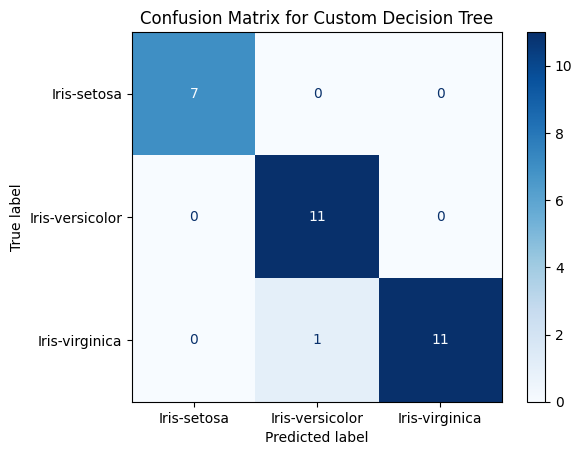

In [40]:
cv_results_df = pd.DataFrame(cv_results)
print("\n=== Custom Decision Tree Model ===")
print(cv_results_df[["Fold Accuracies", "Mean Accuracy"]].sort_values(by="Mean Accuracy", ascending=False))
# Confusion Matrix
cm = confusion_matrix(y_test_fold, y_pred_fold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Custom Decision Tree")
plt.show()

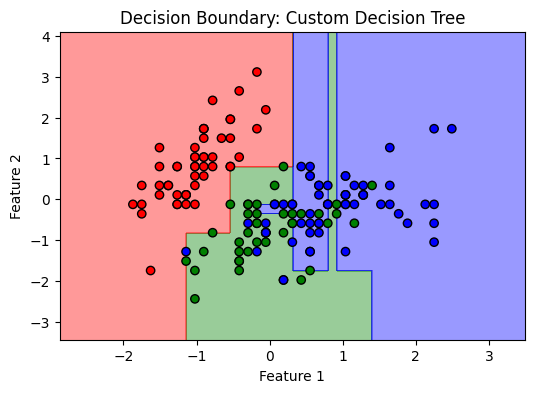

In [44]:
from matplotlib.colors import ListedColormap

# Define the plot function
def plot_decision_boundary_custom(model, X, y, title):
    X = X[:, :2]  # first two features only
    h = .02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train custom decision tree on only the first two features
X_2d = X_scaled[:, :2]
model_2d = DecisionTree(max_depth=6)
model_2d.fit(X_2d, y)

# Plot the decision boundary
plot_decision_boundary_custom(model_2d, X_2d, y, "Decision Boundary: Custom Decision Tree")

KNN

In [51]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        if hasattr(y, "values"):
            self.y_train = y.values
        else:
            self.y_train = y
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

In [53]:
folds = kf.split(X_scaled)
print(f"Number of folds: {k}")
cv_results_knn = []

for train_index, test_index in folds:
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Replace DecisionTree with CustomKNN
    model = KNN(k=3)  # or whatever k you want
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    
    acc = round(accuracy_score(y_test_fold, y_pred_fold), 2)
    
    cv_results_knn.append({
        "Fold Accuracies": acc,
        "Mean Accuracy": acc
    })

Number of folds: 5



=== Custom KNN Model ===
   Fold Accuracies  Mean Accuracy
0             1.00           1.00
1             0.97           0.97
2             0.97           0.97
4             0.97           0.97
3             0.90           0.90


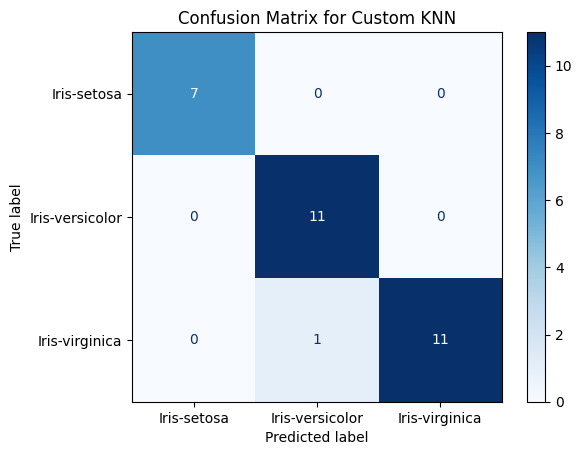

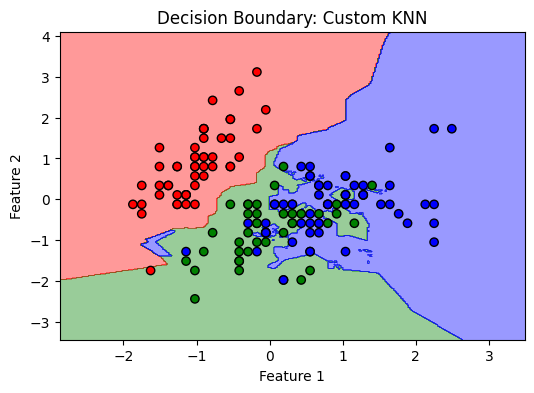

In [54]:
cv_results_df = pd.DataFrame(cv_results_knn)
print("\n=== Custom KNN Model ===")
print(cv_results_df[["Fold Accuracies", "Mean Accuracy"]].sort_values(by="Mean Accuracy", ascending=False)) 
# Confusion Matrix
cm = confusion_matrix(y_test_fold, y_pred_fold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Custom KNN")
plt.show()


In [ ]:
# Decision Boundary Visualization for Custom KNN
def plot_decision_boundary_knn(model, X, y, title):
    X = X[:, :2]  # first two features only
    h = .02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
# Train custom KNN on only the first two features
X_2d = X_scaled[:, :2]
model_2d = KNN(k=3)
model_2d.fit(X_2d, y)
# Plot the decision boundary
plot_decision_boundary_knn(model_2d, X_2d, y, "Decision Boundary: Custom KNN")  


In [55]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = None
        self.feature_likelihoods = None

    def fit(self, X, y):
        self.classes, counts = np.unique(y, return_counts=True)
        self.class_priors = counts / len(y)
        self.feature_likelihoods = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.feature_likelihoods[cls] = {
                'mean': np.mean(X_cls, axis=0),
                'var': np.var(X_cls, axis=0) + 1e-9  # add small value to avoid division by zero
            }

    def predict(self, X):
        posteriors = []
        for x in X:
            posterior = []
            for cls in self.classes:
                prior = self.class_priors[cls]
                likelihood = np.prod(
                    (1 / np.sqrt(2 * np.pi * self.feature_likelihoods[cls]['var'])) *
                    np.exp(-((x - self.feature_likelihoods[cls]['mean']) ** 2) /
                           (2 * self.feature_likelihoods[cls]['var']))
                )
                posterior.append(prior * likelihood)
            posteriors.append(self.classes[np.argmax(posterior)])
        return np.array(posteriors)

Number of folds: 5

=== Custom Naive Bayes Model ===
   Fold Accuracies  Mean Accuracy
0             1.00           1.00
1             0.97           0.97
3             0.97           0.97
2             0.93           0.93
4             0.93           0.93


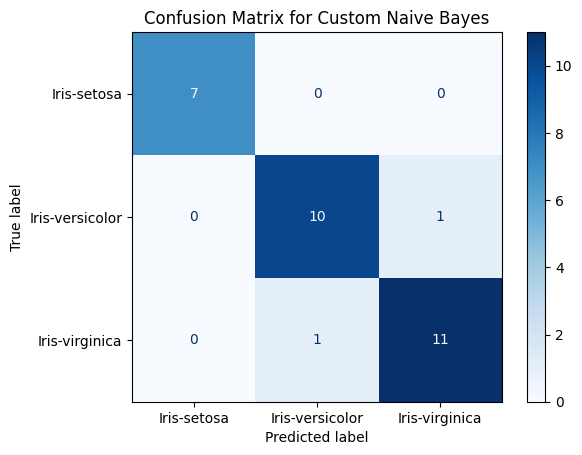

In [56]:
folds = kf.split(X_scaled)
print(f"Number of folds: {k}")  
cv_results_nb = []
for train_index, test_index in folds:
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = NaiveBayes()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    
    acc = round(accuracy_score(y_test_fold, y_pred_fold), 2)
    
    cv_results_nb.append({
        "Fold Accuracies": acc,
        "Mean Accuracy": acc
    })
cv_results_df = pd.DataFrame(cv_results_nb)
print("\n=== Custom Naive Bayes Model ===")
print(cv_results_df[["Fold Accuracies", "Mean Accuracy"]].sort_values(by="Mean Accuracy", ascending=False))
# Confusion Matrix
cm = confusion_matrix(y_test_fold, y_pred_fold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Custom Naive Bayes")
plt.show()


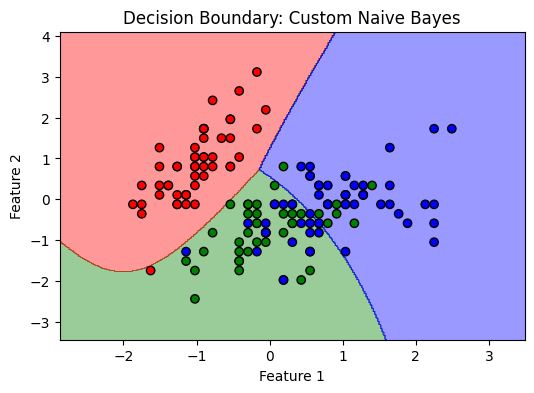

In [57]:
# Decision Boundary Visualization for Custom Naive Bayes
def plot_decision_boundary_nb(model, X, y, title):
    X = X[:, :2]  # first two features only
    h = .02  # step size in mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
# Train custom Naive Bayes on only the first two features
X_2d = X_scaled[:, :2]
model_2d = NaiveBayes()
model_2d.fit(X_2d, y)
# Plot the decision boundary
plot_decision_boundary_nb(model_2d, X_2d, y, "Decision Boundary: Custom Naive Bayes")